In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time

In [2]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)

5.008643865585327


(0.0, 1.0)

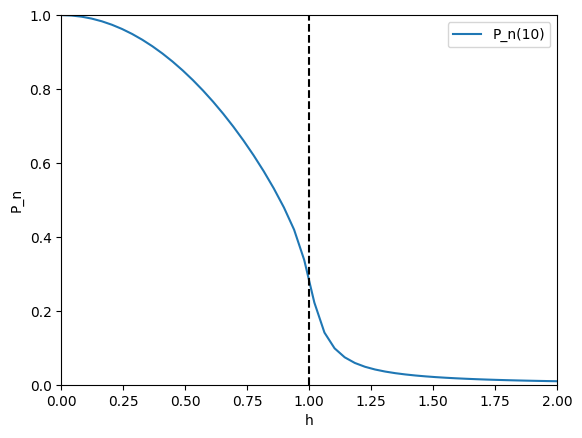

In [4]:
#Initialize Test
J = -1
L = 64
h_i = np.linspace(0,2,50)
timer = time()
dat = []
for h in h_i:
    H = sps.H_bdg(h,L,J)
    E,V = la.eigh(H)
    G = sps.G_tfim(V[:,:L])
    dat.append(sps.P_n(10,G,L))
print(time()-timer)
plt.plot(h_i,dat, label = "P_n(10)")
plt.legend()
plt.xlabel("h")
plt.ylabel("P_n")
plt.vlines(1,0,1, color = "black", linestyle = "--")
plt.xlim(h_i[0],h_i[-1])
plt.ylim(0,1)

In [25]:
#Model Parameters
L = 64
J = -1
h0 = 0
hf = 5
taus = np.logspace(-1,2,15)
N_steps = 500

#Time Evolved States:
Ut_tau = []
GS_T_tau = []
times_tau =[]
for tau in taus:
    times = np.linspace(0,tau,N_steps)

    Ut = sps.TFIM_time_evolve(N_steps,tau,h0,hf,J,L)
    #Ground States
    GS_T = []
    for ti in range(N_steps):
        h = sps.h_t(times[ti],tau,h0,hf)
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        GS_T.append(V)
    Ut_tau.append(Ut)
    GS_T_tau.append(GS_T)
    times_tau.append(times)

<class 'numpy.ndarray'>


/home/kristian/miniconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Adiabatic Tests/../../../../src/single_particle_sector.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


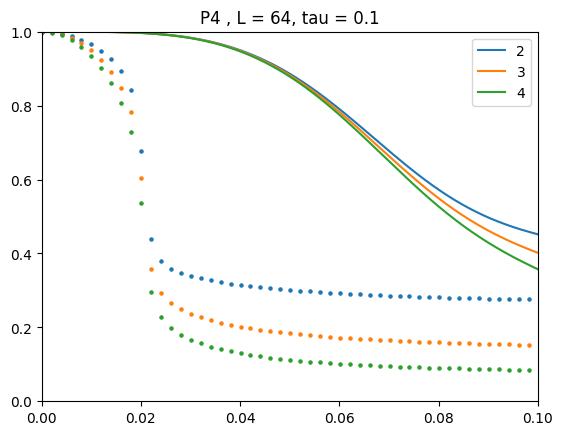

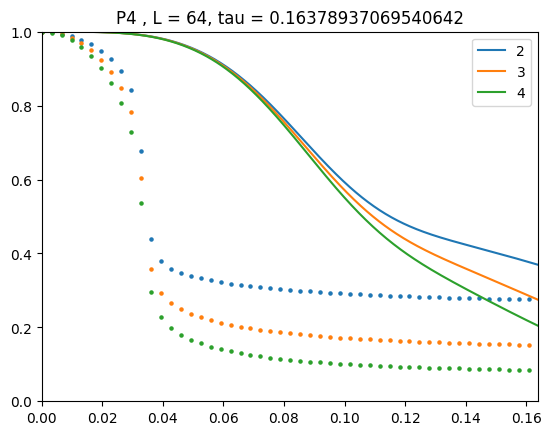

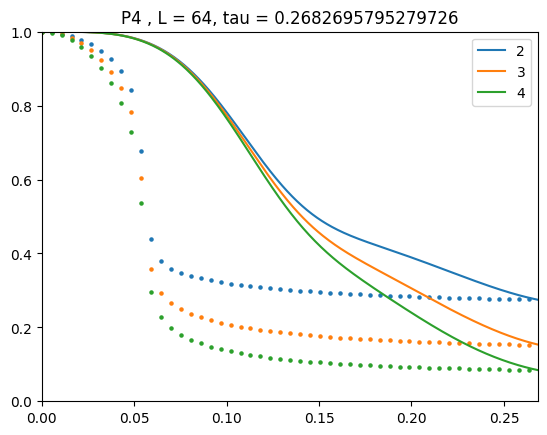

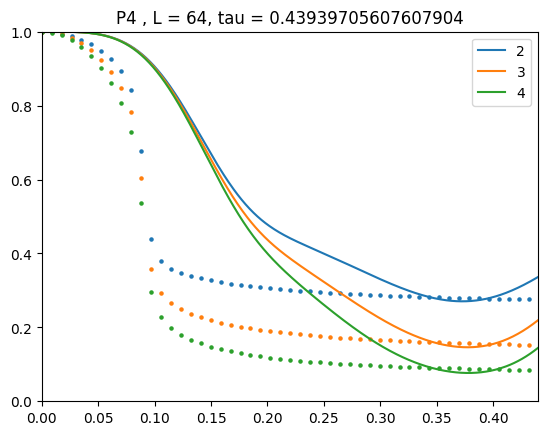

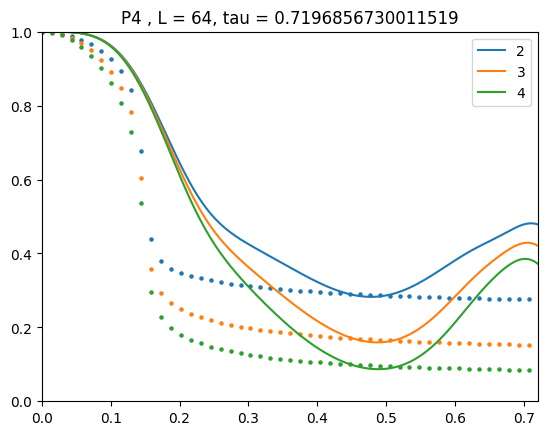

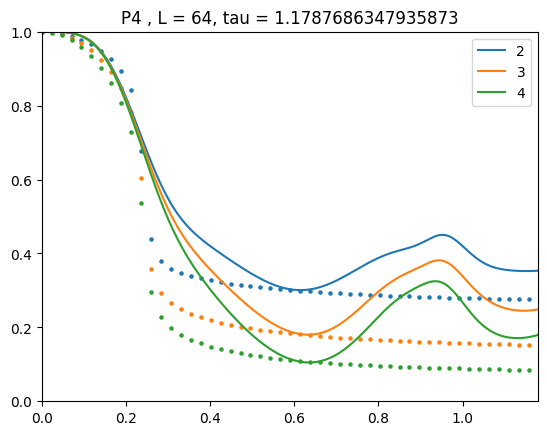

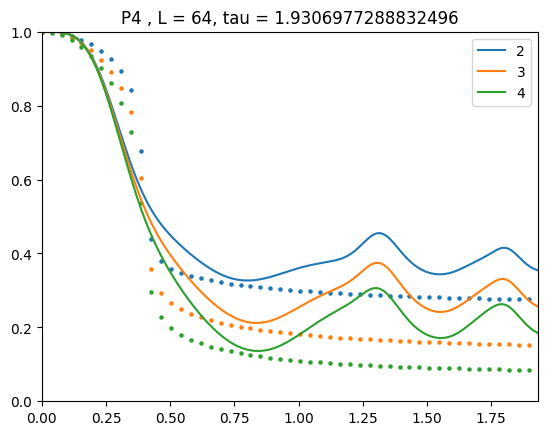

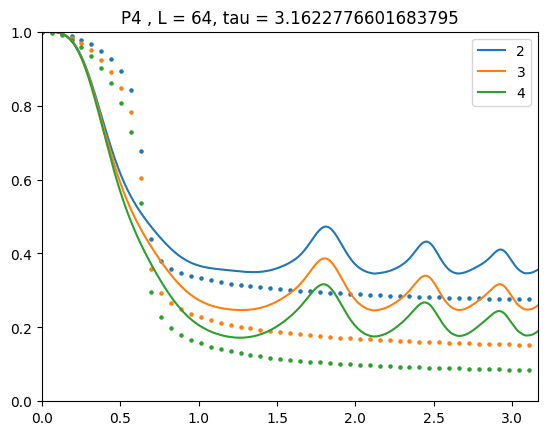

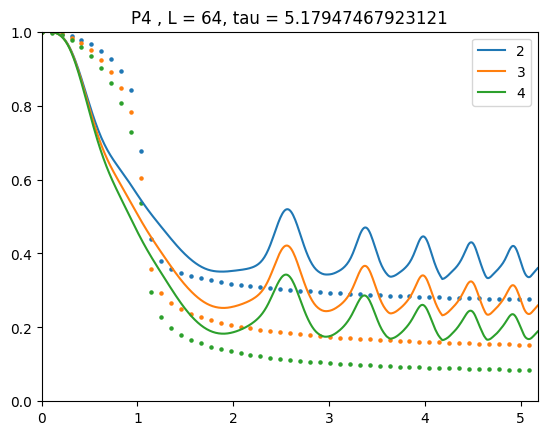

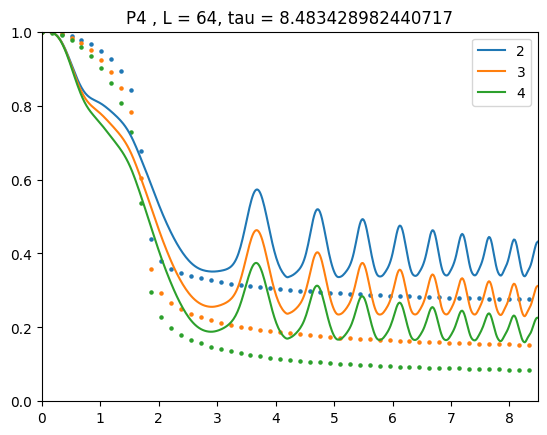

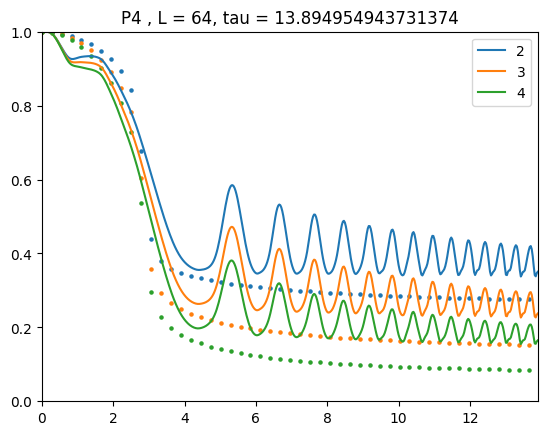

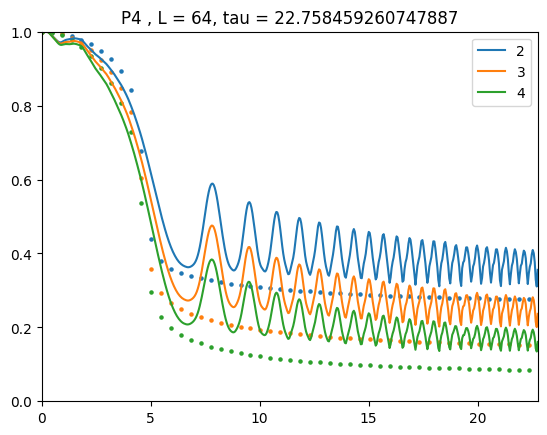

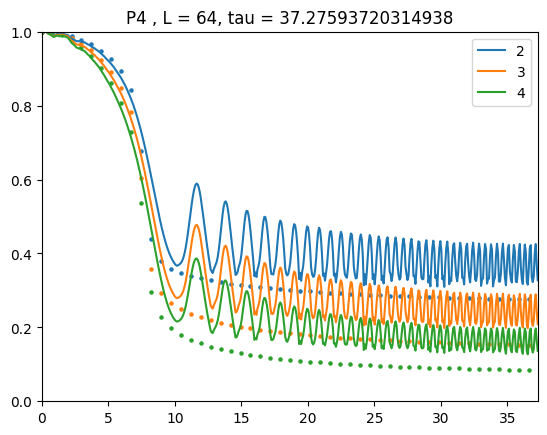

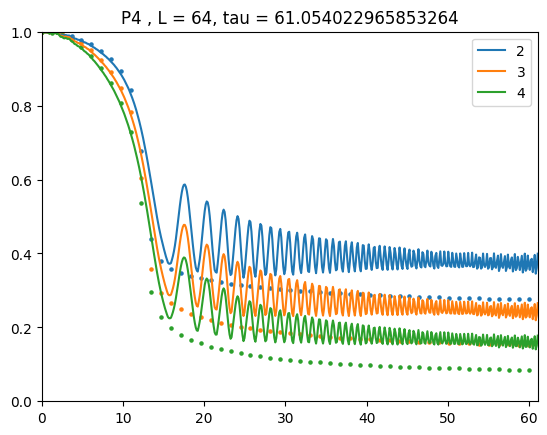

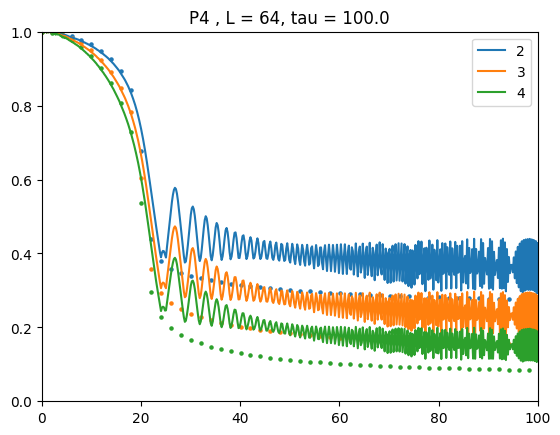

In [26]:
ns = [2,3,4,]
#i = time step
for j in range(0,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    #fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]
        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    #plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")
    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

KeyboardInterrupt: 

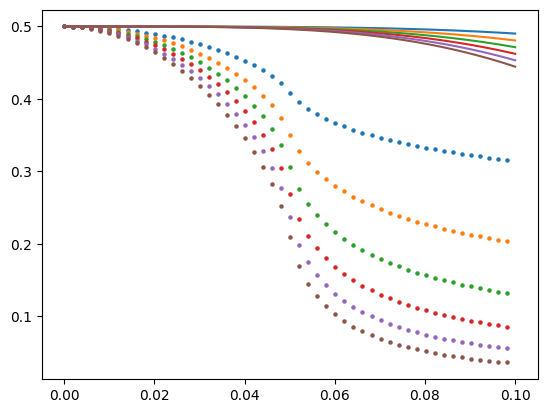

In [92]:
ns = [2,3,4,5,6,7,8]
#i = time step
for j in range(0,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    #fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]
        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    #plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")
    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,0.5)
    plt.show()

/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Adiabatic Tests/../../../../src/single_particle_sector.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


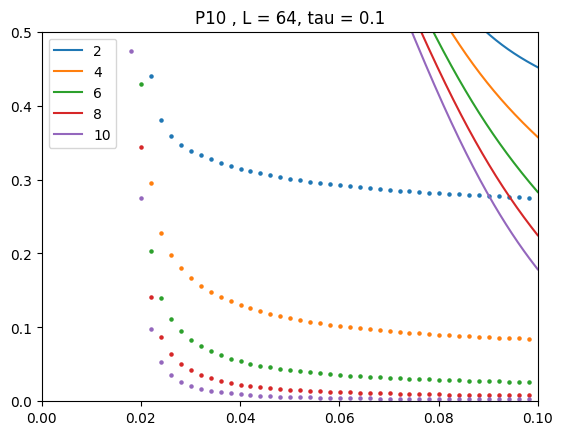

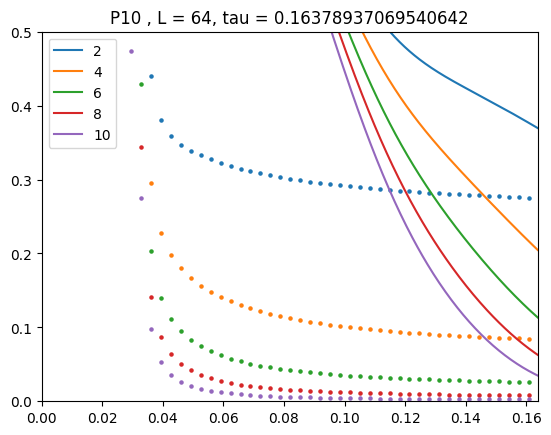

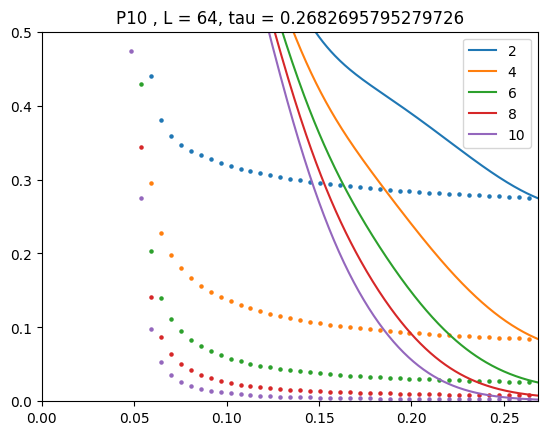

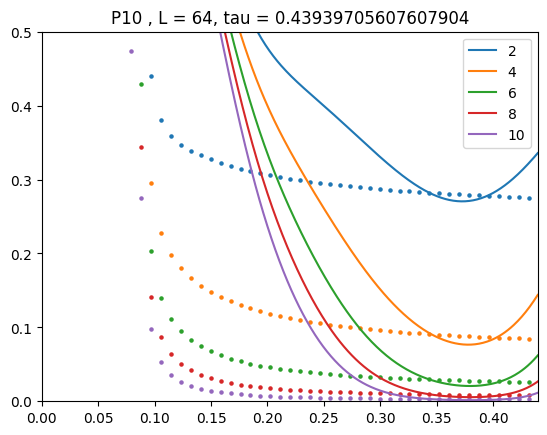

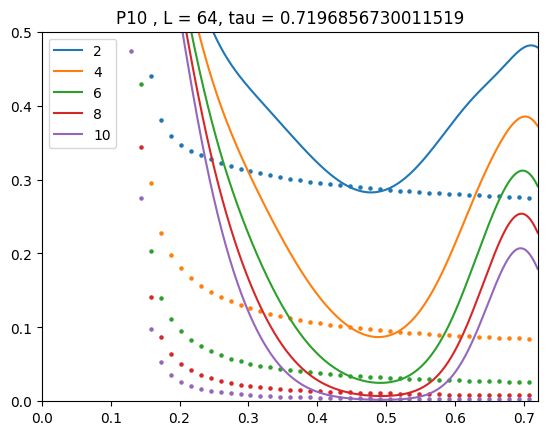

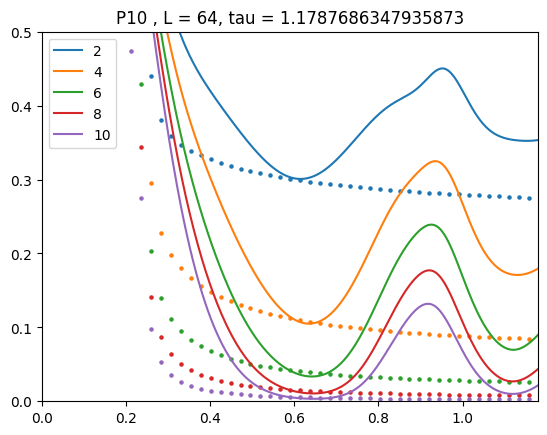

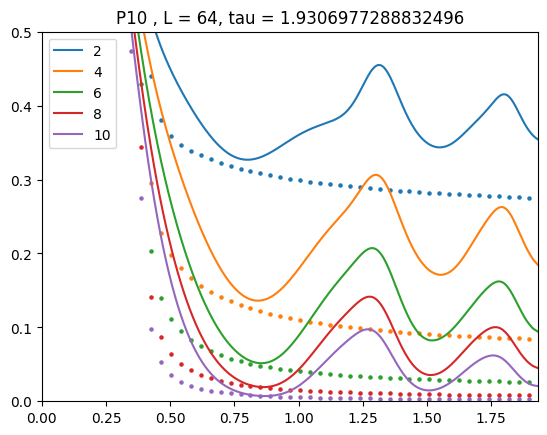

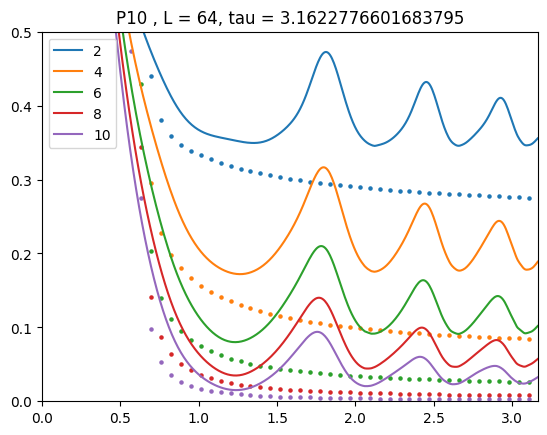

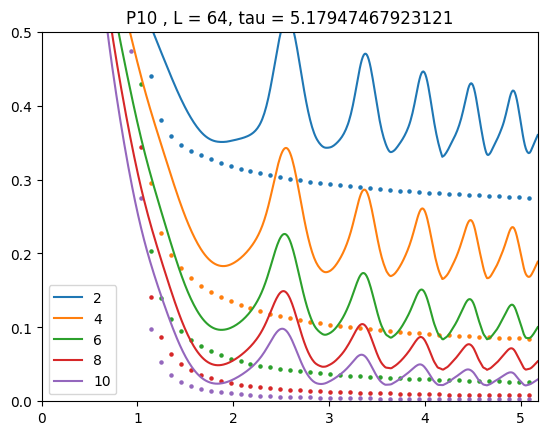

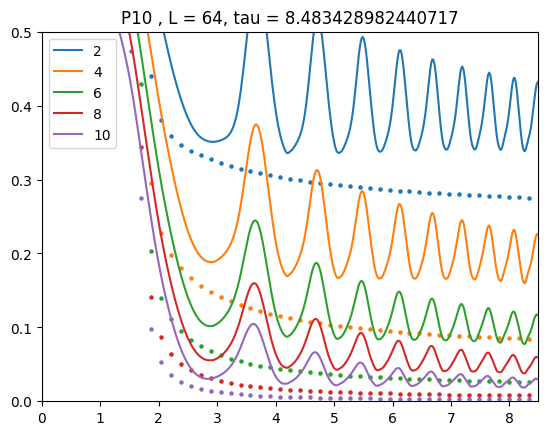

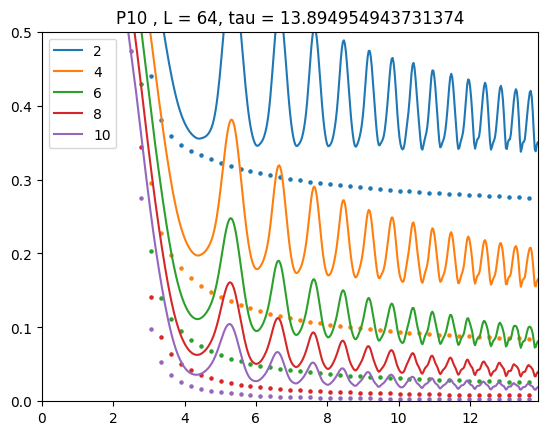

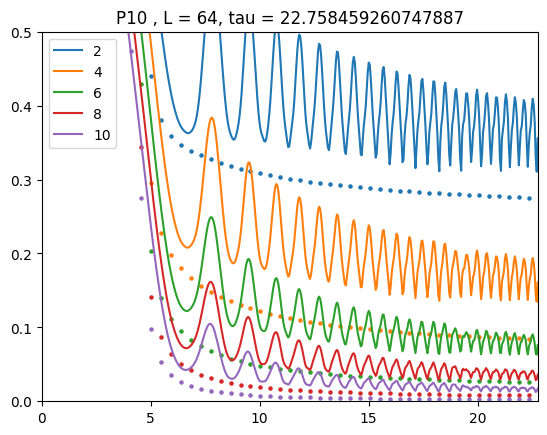

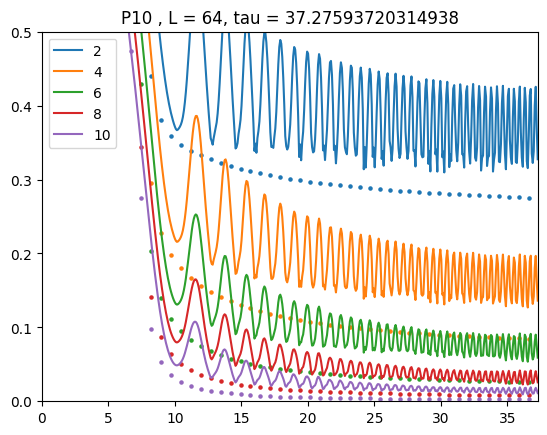

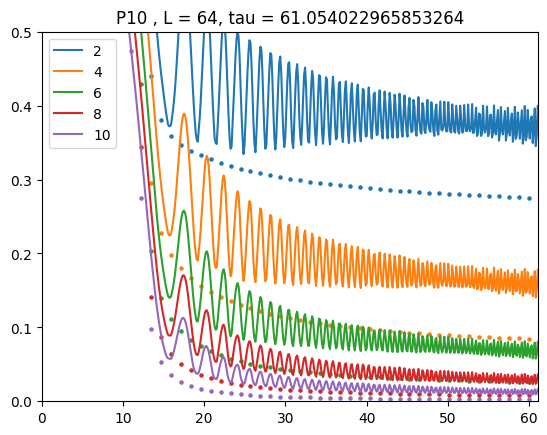

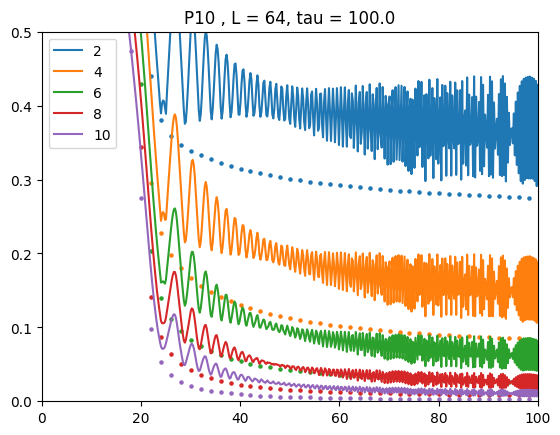

In [43]:
ns = [2,4,6,8,10]
#i = time step
diffs_tau = []
for j in range(0,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    #fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]
    diffs_n =[]
    for n in ns:
        P_t= np.array([sps.P_n(n,Gi,L) for Gi in G_t])
        P_gs=np.array([sps.P_n(n,Gi,L) for Gi in G_gs])
        diffs_n.append(P_t-P_gs)

        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    diffs_tau.append(np.array(diffs_n))
    #plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")
    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,0.5)
    plt.show()

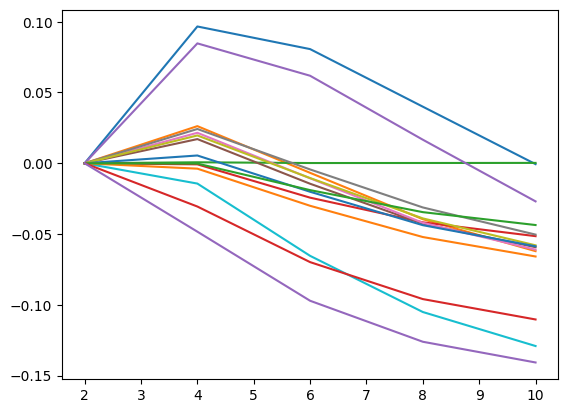

In [46]:
plt.figure()
for j in range(0,len(taus),1):
    plt.plot(ns,diffs_tau[j][:,-1]-diffs_tau[j][0,-1], label=f"{taus[j]}")
#plt.yscale("log")
#plt.legend()


0.1
2


/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Adiabatic Tests/../../../../src/single_particle_sector.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


4
6
8
10


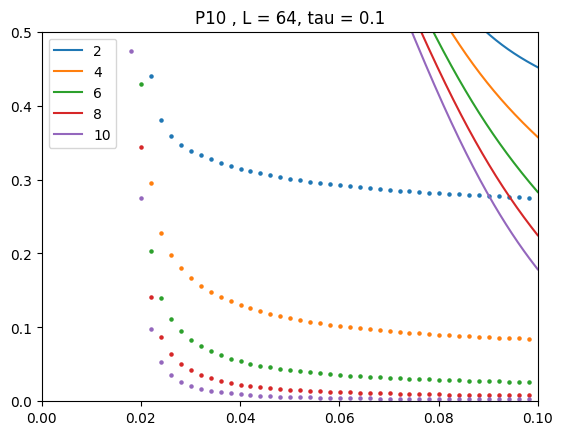

0.16378937069540642
2
4
6
8
10


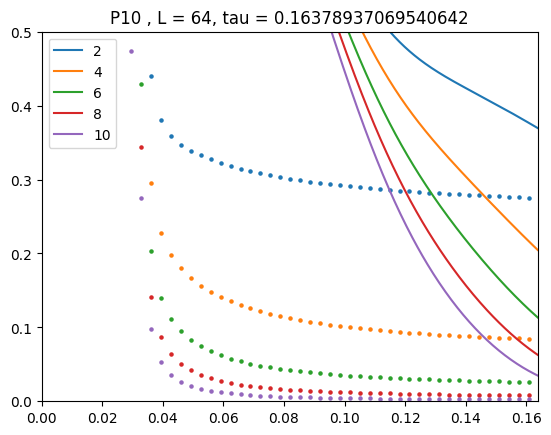

0.2682695795279726
2
4
6
8
10


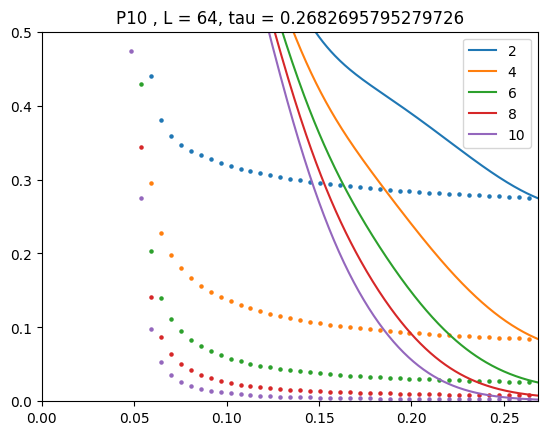

0.43939705607607904
2
4
6
8
10


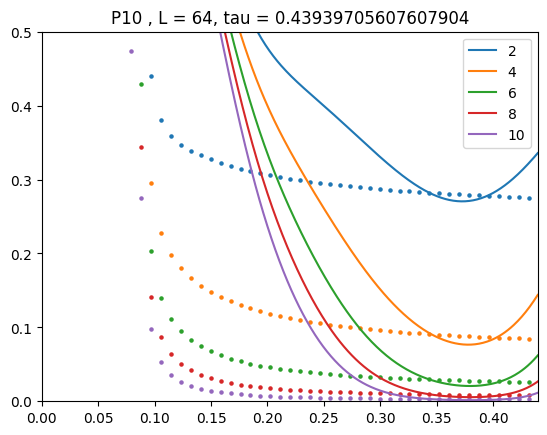

0.7196856730011519
2
4
6
8
10


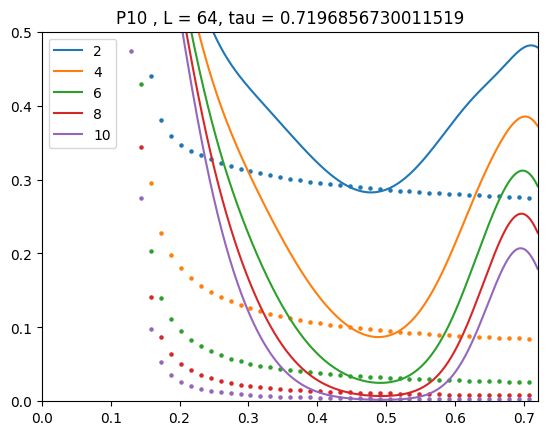

1.1787686347935873
2
4
6
8
10


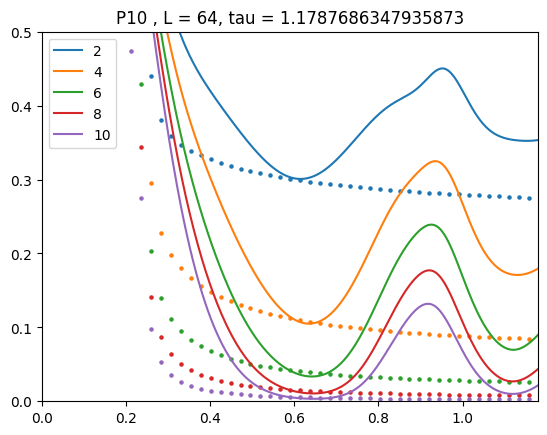

1.9306977288832496
2
4
6
8
10


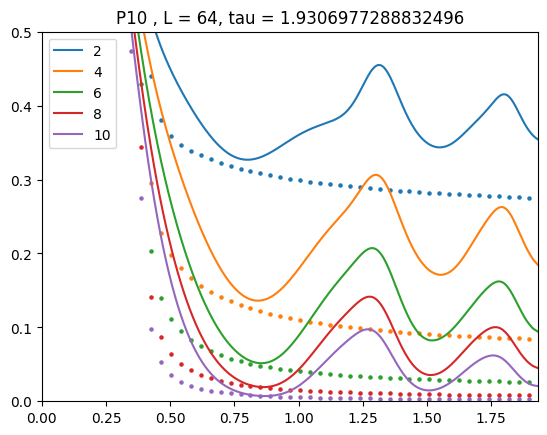

3.1622776601683795
2
4
6
8
10


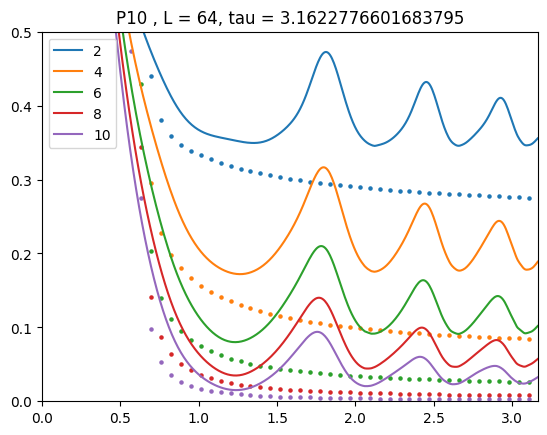

5.17947467923121
2
4
6
8
10


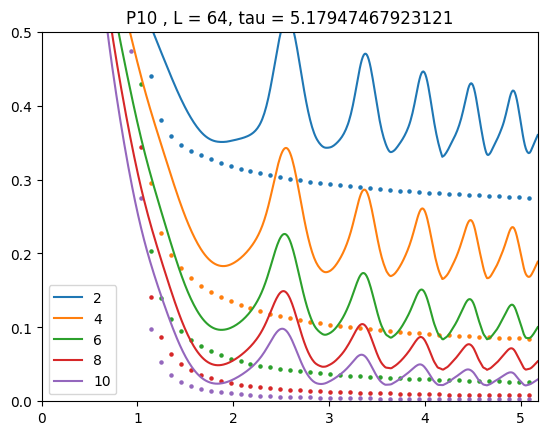

8.483428982440717
2
4
6
8
10


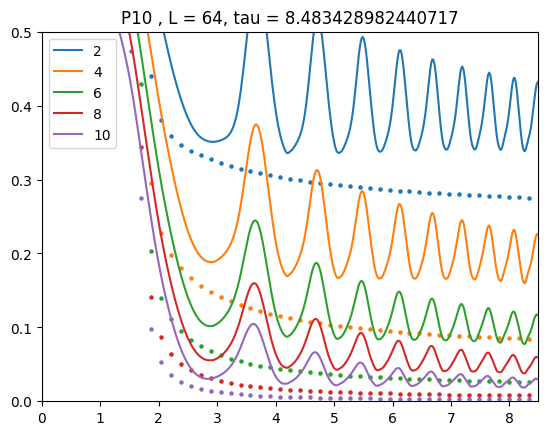

13.894954943731374
2
4
6
8
10


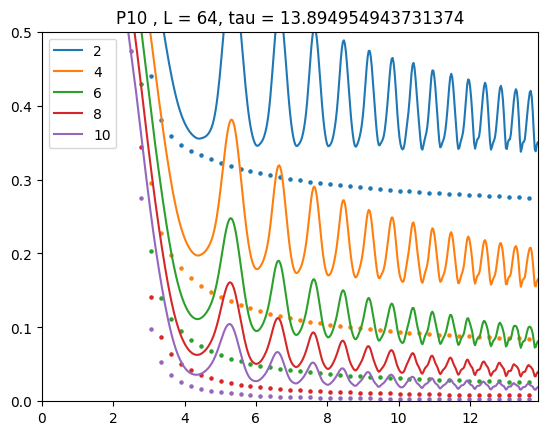

22.758459260747887
2
4
6
8
10


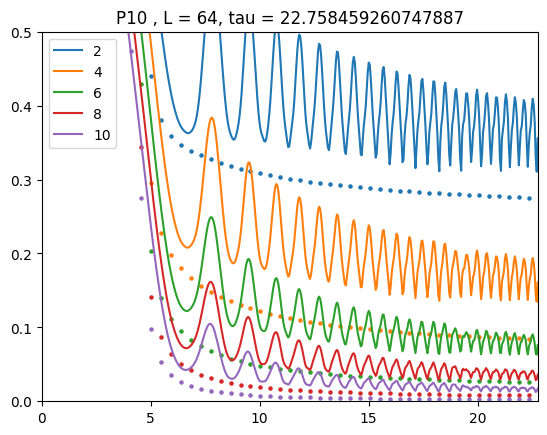

37.27593720314938
2
4
6
8
10


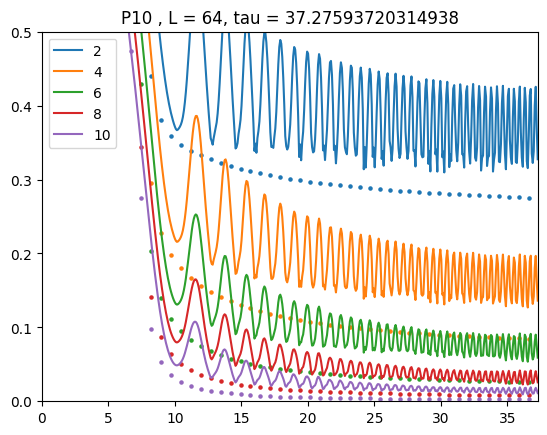

61.054022965853264
2
4
6
8
10


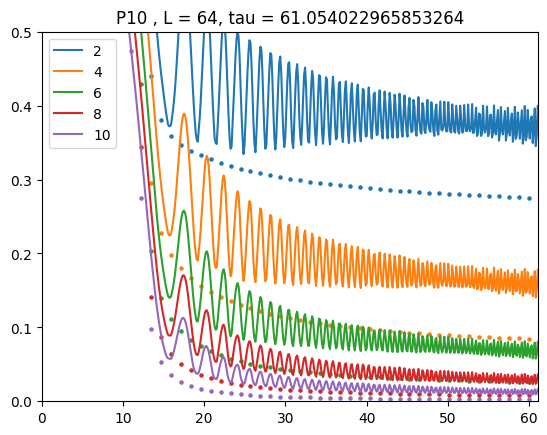

100.0
2
4
6
8
10


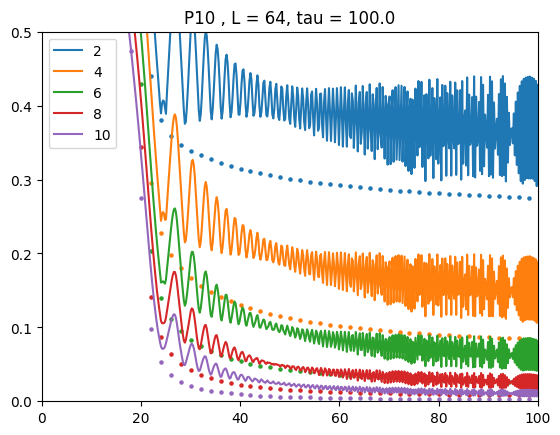

In [47]:
P_t_all = []
P_gs_all = []
diffs_tau = []

for j in range(0, len(taus)):
    print(taus[j])
    plt.figure()
    G_t = [sps.G_tfim(Ut_tau[j][ti][:, :L]) for ti in range(N_steps)]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]

    diffs_n = []
    P_t_tau = []
    P_gs_tau = []

    for n in ns:
        print(n)
        P_t = np.array([sps.P_n(n, Gi, L) for Gi in G_t])
        P_gs = np.array([sps.P_n(n, Gi, L) for Gi in G_gs])

        diffs_n.append(P_t - P_gs)
        P_t_tau.append(P_t)
        P_gs_tau.append(P_gs)

        plt.scatter(times_tau[j][::10], P_gs[::10], s=5)
        plt.plot(times_tau[j], P_t, label=f"{n}")

    P_t_all.append(np.array(P_t_tau))     # shape: (len(ns), len(times))
    P_gs_all.append(np.array(P_gs_tau))   # shape: (len(ns), len(times))
    diffs_tau.append(np.array(diffs_n))   # shape: (len(ns), len(times))

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")
    plt.legend()
    plt.xlim(times_tau[j][0], times_tau[j][-1])
    plt.ylim(0, 0.5)
    plt.show()

P_t_all = np.array(P_t_all)     # shape: (len(taus), len(ns), len(times))
P_gs_all = np.array(P_gs_all)   # shape: (len(taus), len(ns), len(times))


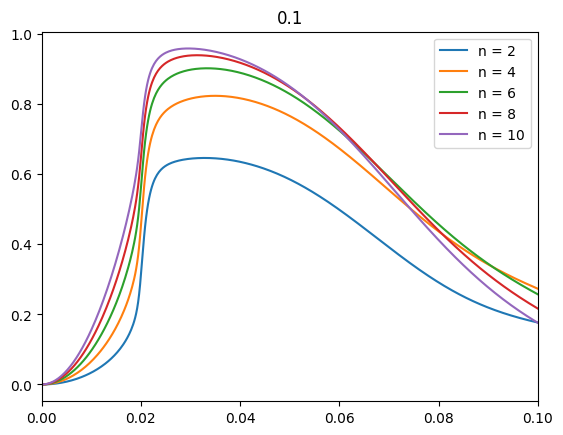

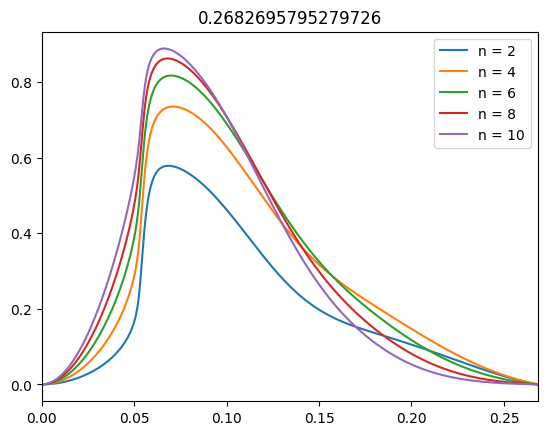

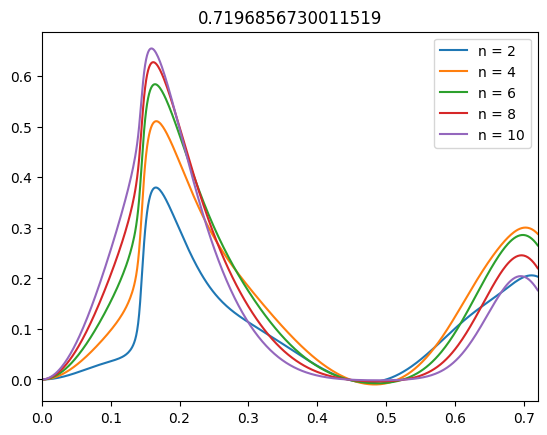

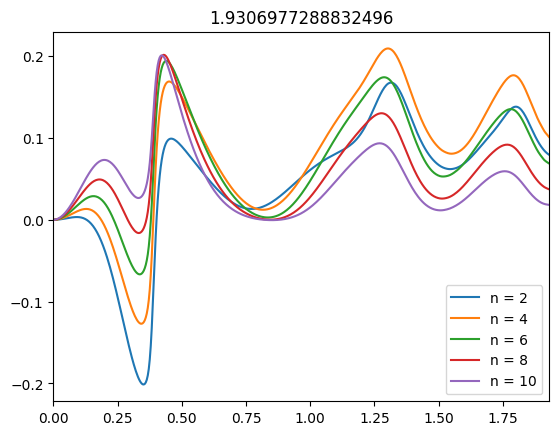

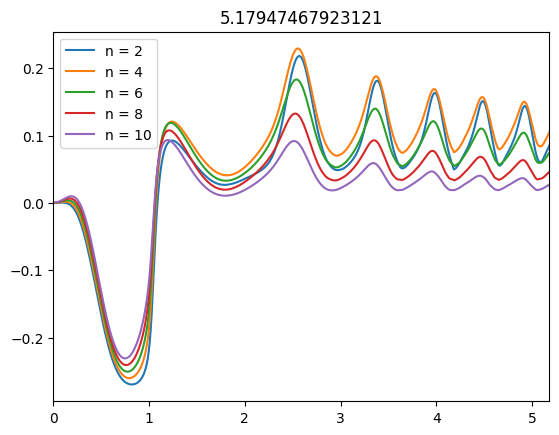

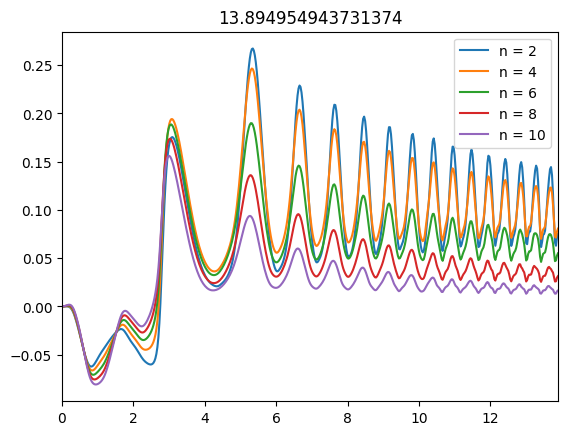

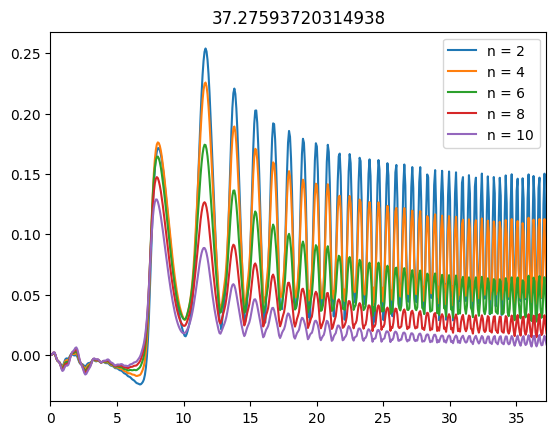

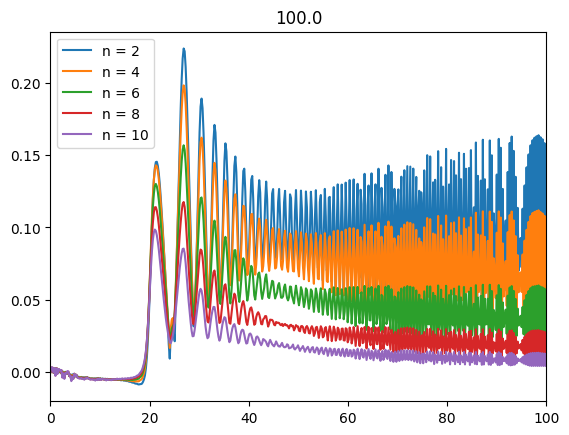

In [96]:
for t in range(0,len(times_tau),2):
    plt.figure()
    for n in range(0,len(ns)):    

        plt.plot(times_tau[t],(P_t_all[t,n,:]-P_gs_all[t,n,:]),label = f"n = {ns[n]}")  # shape: (len(taus), len(ns), len(times))
        plt.xlim(times_tau[t][0],times_tau[t][-1])
        plt.legend()
       # plt.yscale("log")
        plt.title(f"{times_tau[t][-1]}")
    plt.savefig(f"increasing_adiabaticity_tau={str(times_tau[t][-1])[:6]}.png")